In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import FactorAnalysis

In [2]:
df = pd.read_csv('D:/AAA/sem3/Proj3/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#IsActiveMember =1 active, 0 = not active

In [7]:
df = df.dropna()

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

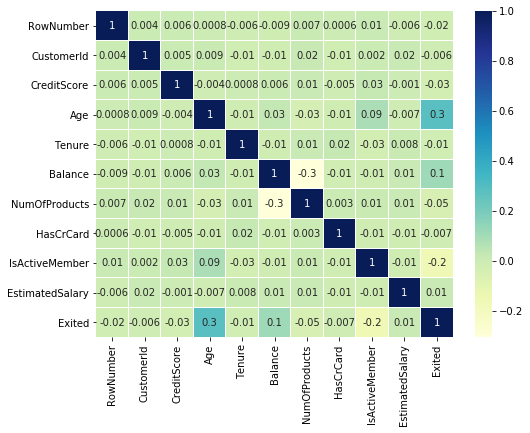

In [11]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, linewidths= 0.01 ,cmap="YlGnBu" ,fmt='.01g', annot = True)

Text(0.5, 1, 'Tenure of Customer')

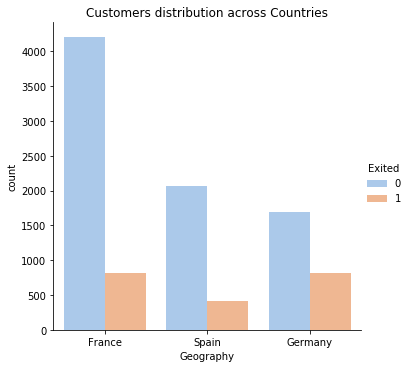

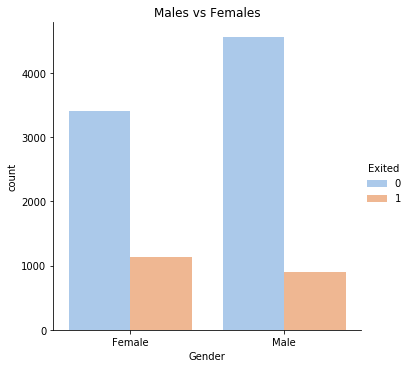

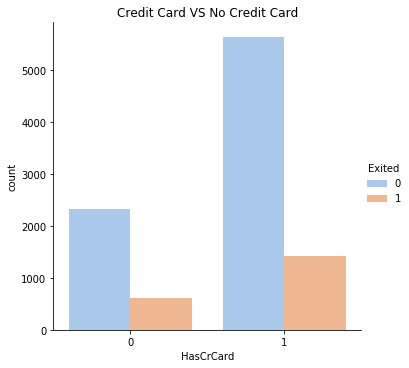

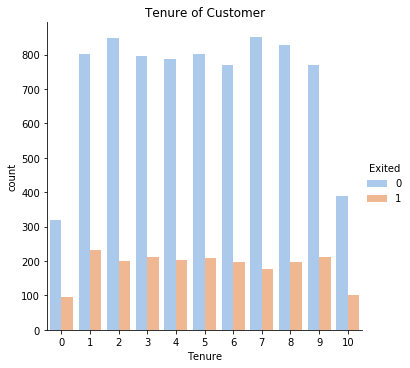

In [12]:
#fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.catplot(x = 'Geography', kind = 'count',hue ='Exited', data = df, palette = 'pastel')
plt.title('Customers distribution across Countries')
sns.catplot(x = 'Gender', kind = 'count',hue ='Exited', data = df, palette = 'pastel')
plt.title("Males vs Females")
sns.catplot(x = 'HasCrCard', kind = 'count',hue ='Exited', palette = 'pastel', data = df)
plt.title("Credit Card VS No Credit Card")
sns.catplot(x = 'Tenure', kind = 'count',hue ='Exited' ,palette = 'pastel', data = df)
plt.title("Tenure of Customer")


Text(0.5, 1, 'Active VS Non-Active Members')

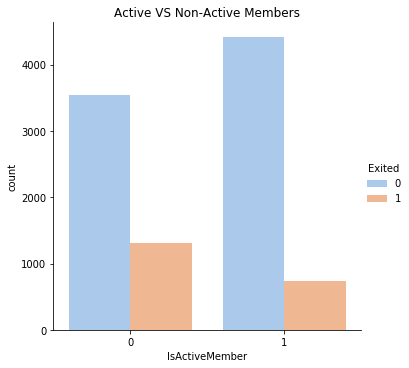

In [13]:
sns.catplot(x = 'IsActiveMember', kind = 'count',hue ='Exited',palette = 'pastel', data = df)
plt.title("Active VS Non-Active Members")


In [14]:
newdf = pd.DataFrame()
newdf= df[df['Exited'] == 1]['Balance'].sum()
#newdf = df[df['Exited'] == 0]['Balance'].sum()
newdf

185588094.63

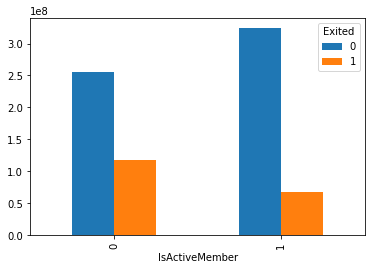

In [15]:
df.groupby(['IsActiveMember','Exited']).Balance.sum().unstack().plot(kind='bar')#'bar',stacked=True) for stacked

<Figure size 1080x1080 with 0 Axes>

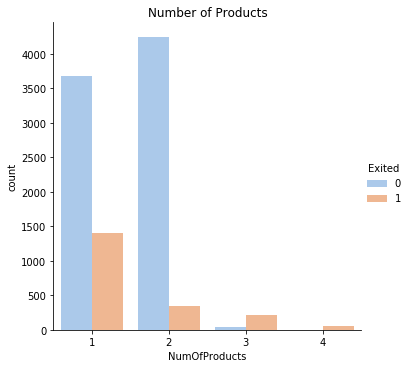

In [16]:
plt.figure(figsize = (15,15))
sns.catplot(x = "NumOfProducts", kind = 'count', hue = 'Exited', palette = 'pastel', data = df )
plt.title('Number of Products')
plt.show()


In [17]:
churn_data = df

In [18]:
churn = churn_data.loc[churn_data['Exited'] == 1]
not_churn = churn_data.loc[churn_data['Exited'] == 0]

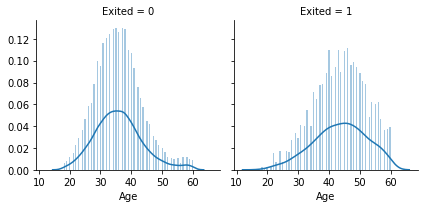

In [66]:
g = sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 100)
plt.show()

In [20]:
#plt.figure(figsize = (15,15))
#sns.distplot(churn['Age'])
#plt.title("Age")
#plt.show()
#plt.figure(figsize = (15,15))
#sns.distplot(churn1['Age'])
#plt.title("Age")
#plt.show()

Text(0.5, 1, 'Not Churn data')

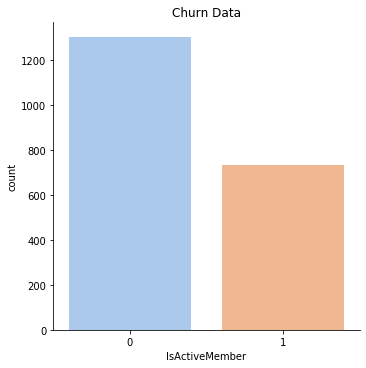

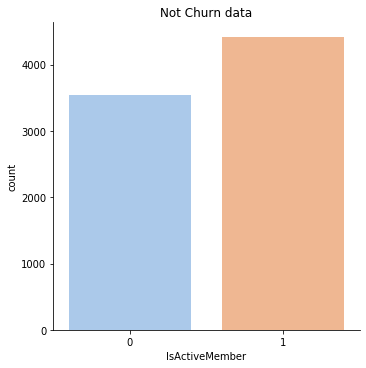

In [21]:
sns.catplot(x = 'IsActiveMember', kind = 'count', data = churn, palette = 'pastel')
plt.title("Churn Data")
sns.catplot(x = 'IsActiveMember', kind = 'count', data = not_churn, palette = 'pastel')
plt.title("Not Churn data")

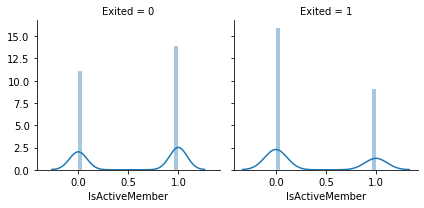

In [22]:
g = sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "IsActiveMember", bins = 25)
plt.show()

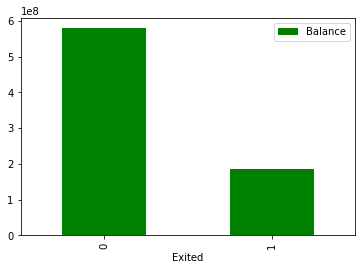

In [23]:
df.groupby(by='Exited').sum().plot.bar(y='Balance',color='g')

In [24]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df = df[(df["Age"] <=60)]
df = df[(df["CreditScore"] >400)]

In [25]:
bank_data = df

In [26]:
target_count = bank_data.Exited.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 7614
Class 1: 1903


In [27]:
count_class_0, count_class_1 = bank_data.Exited.value_counts()

# Divide by class
df_class_0 = bank_data[bank_data['Exited'] == 0]
df_class_1 = bank_data[bank_data['Exited'] == 1]

In [28]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
bank_data_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(bank_data_over.Exited.value_counts())

Random over-sampling:
1    7614
0    7614
Name: Exited, dtype: int64


In [62]:
X=bank_data_over.iloc[:,0:10]
y=bank_data_over["Exited"]

In [63]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [64]:
X=pd.concat([X,geography,gender],axis=1)

In [32]:
X=X.drop(['Geography','Gender'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,1


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
# logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=0)
lr.fit(X_train,y_train)
y_pred_logistic=lr.predict(X_test)
correct = (y_test == y_pred_logistic).sum()
incorrect = (y_test != y_pred_logistic).sum()
accuracy = correct / (correct + incorrect) * 100

In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.550025
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                12182
Model:                          Logit   Df Residuals:                    12171
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Jun 2020   Pseudo R-squ.:                  0.2065
Time:                        13:37:47   Log-Likelihood:                -6700.4
converged:                       True   LL-Null:                       -8443.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0337      0.021     -1.590      0.112      -0.075       0.008
x2             1.0444      0.

In [39]:
prediction = pd.DataFrame()
prediction['actual'] = y_test
prediction['predicted'] = y_pred_logistic
prediction['correct'] = prediction['actual'] == prediction['predicted']

print ('\nDetailed results for first 20 tests:')
print (prediction.head(20))


Detailed results for first 20 tests:
      actual  predicted  correct
5853       1          1     True
1957       1          1     True
9299       1          0    False
5448       1          1     True
2951       1          0    False
8248       0          0     True
8537       0          1    False
3653       0          1    False
3028       0          1    False
9063       0          0     True
2124       1          0    False
5914       0          0     True
5092       1          0    False
5847       1          1     True
2973       1          1     True
5445       0          0     True
3080       0          0     True
3919       0          1    False
6836       0          0     True
9856       1          1     True


In [40]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
c_logistic=confusion_matrix(y_test,y_pred_logistic)
print(c_logistic)

#Accuracy of our model.
Accuracy_logistic=sum(np.diag(c_logistic))/(np.sum(c_logistic))
Accuracy_logistic

[[1120  414]
 [ 447 1065]]


0.7173342087984241

Text(0.5, 15.0, 'Predicted label')

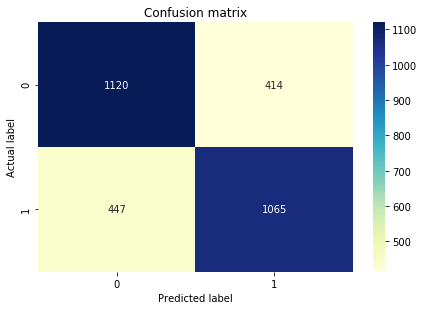

In [41]:
# create heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax = plt.subplots()
sns.heatmap(pd.DataFrame(c_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
# ROC_AUC 
from sklearn.metrics import roc_auc_score, roc_curve
logistic_roc_auc = roc_auc_score(y_test, y_pred_logistic , average = 'macro', sample_weight = None)
logistic_roc_auc

0.7172412098259556

In [43]:
# Random ForestAccuracy_logistic

In [44]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_ensemble = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Fitting the model with training data
classifier_ensemble.fit(X_train, y_train)

# Predicting the Test set results
y_predict_ensemble = classifier_ensemble.predict(X_test)

In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_ensemble=confusion_matrix(y_test,y_predict_ensemble)
print(c_ensemble)

#Accuracy of our model.
Accuracy_ensemble=sum(np.diag(c_ensemble))/(np.sum(c_ensemble))
Accuracy_ensemble

[[1409  125]
 [  38 1474]]


0.9464871963230466

Text(0.5, 15.0, 'Predicted label')

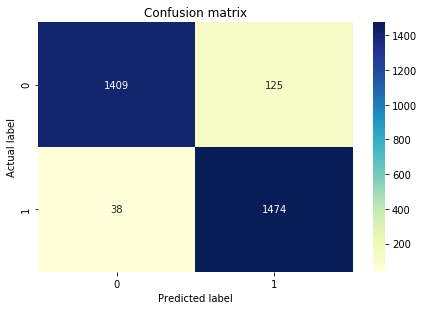

In [46]:
# create heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax = plt.subplots()
sns.heatmap(pd.DataFrame(c_ensemble), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
# ROC AUC
ensemble_roc_auc = roc_auc_score(y_test, y_predict_ensemble , average = 'macro')
ensemble_roc_auc

0.9466907072839277

In [48]:
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.256383
 2) Age                            0.143012
 3) Tenure                         0.141634
 4) Balance                        0.134659
 5) NumOfProducts                  0.133580
 6) HasCrCard                      0.080741
 7) IsActiveMember                 0.030134
 8) EstimatedSalary                0.027479
 9) Germany                        0.021053
10) Spain                          0.017840
11) Male                           0.013484


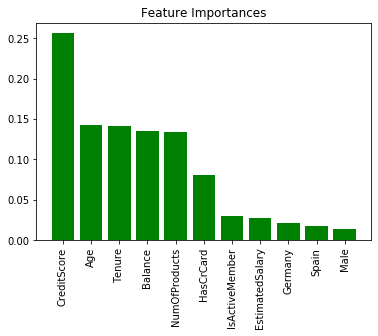

In [49]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

In [50]:
# The graph above shows the features with the highest importance value to the lowest importance value. It shows the most important features are creditscore, age, tenure, balance, and so on. We will surely revisit again feature engineering in the upcoming sections.

In [51]:
# decision tree

In [52]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Fitting the model with training data
classifier_tree=classifier_tree.fit(X_train, y_train)

# Predicting the Test set results
y_predict_tree = classifier_tree.predict(X_test)

In [53]:
import matplotlib 
from sklearn import tree
#tree.plot_tree(classifier_tree)
#plt.show()
#dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=feature_col, proportion=False)
#graph = pydot.graph_from_dot_data(dot_data)  
#graph.write_pdf("test.pdf")
tree.export_graphviz(classifier_tree, out_file='tree.dot')

In [54]:
x_train = X_train
y_train =  y_train
x_test = X_test
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))


Criterion=gini 0.9231779382797111
Criterion=entropy 0.9162836506894287


In [55]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)

C:\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


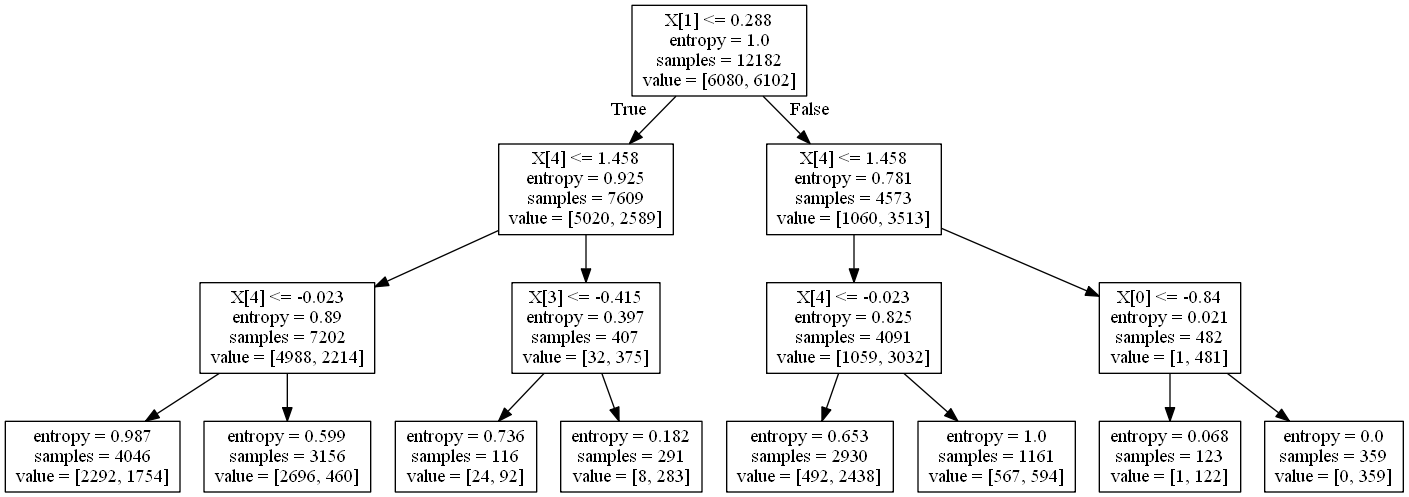

In [56]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image 
dt = dtree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [57]:
pd.DataFrame(data=x_test)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.555731,0.011236,-0.003081,-0.310112,2.199044,0.651124,-0.899759,0.827186,1.508513,-0.546680,1.001972
1,0.624568,1.560397,0.341224,1.458499,-0.763331,0.651124,1.111409,1.146651,-0.662904,-0.546680,1.001972
2,1.804866,-1.537924,0.685529,1.054004,-0.763331,0.651124,-0.899759,-1.372886,-0.662904,-0.546680,1.001972
3,-0.431489,0.453854,-0.003081,0.726817,-0.763331,-1.535806,1.111409,0.545949,1.508513,-0.546680,-0.998032
4,1.173303,-0.984653,0.685529,1.016604,0.717857,0.651124,1.111409,0.682034,1.508513,-0.546680,1.001972
...,...,...,...,...,...,...,...,...,...,...,...
3041,-0.835275,-0.542035,-1.035995,0.451134,2.199044,0.651124,-0.899759,0.146082,1.508513,-0.546680,1.001972
3042,-1.560020,0.232545,-1.724604,1.068997,-0.763331,0.651124,1.111409,-1.495020,-0.662904,1.829223,-0.998032
3043,-1.715323,1.671051,1.029833,1.104154,2.199044,-1.535806,-0.899759,0.634410,1.508513,-0.546680,-0.998032
3044,-0.607498,0.232545,1.374138,1.304221,0.717857,0.651124,1.111409,0.534304,-0.662904,-0.546680,1.001972


In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
c_tree=confusion_matrix(y_test,y_predict_tree)
print(c_tree)

#Accuracy of our model.
Accuracy_tree=sum(np.diag(c_tree))/(np.sum(c_tree))
Accuracy_tree

[[1301  233]
 [  19 1493]]


0.9172685489166119

Text(0.5, 15.0, 'Predicted label')

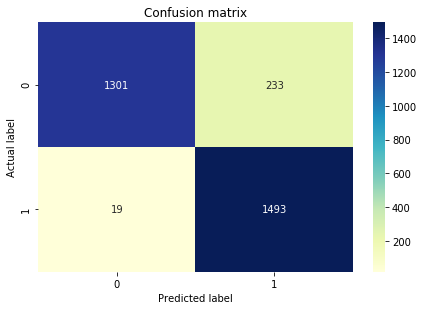

In [59]:
# create heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax = plt.subplots()
sns.heatmap(pd.DataFrame(c_tree), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
# ROC AUC
#import keras
#from keras.utils.vis_utils import plot_model
tree_roc_auc = roc_auc_score(y_test, y_predict_tree , average = 'macro')
tree_roc_auc
#plot_model(tree_roc_auc)

0.9177716900174527

In [61]:
models = [ 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [Accuracy_logistic,Accuracy_tree, Accuracy_ensemble]
roc_auc = [logistic_roc_auc,tree_roc_auc, ensemble_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,roc_auc
Logistic Regression,0.717334,0.717241
Decision Tree,0.917269,0.917772
Random Forest,0.946487,0.946691
